In [1]:
import pandas as pd
df_dbd = pd.read_csv("data_dbd_2018 2019.csv")
df_curah_hujan = pd.read_csv("data curah hujan jakarta pusat perbulan tahun 2018-2020.csv")

In [2]:
# gabung data dbd dengan data curah hujan
df_curah_hujan_training = df_curah_hujan['curah_hujan'] # ambil hanya kolom curah hujan
df_training = pd.concat([df_dbd, df_curah_hujan_training], axis="columns")
df_training

,tahun,bulan,penderita_dbd,curah_hujan
0,2018.0,1.0,17.0,215.1
1,2018.0,2.0,9.0,431.2
2,2018.0,3.0,11.0,188.6
3,2018.0,4.0,25.0,159.1
4,2018.0,5.0,23.0,16.7
5,2018.0,6.0,7.0,12.6
6,2018.0,7.0,7.0,14.5
7,2018.0,8.0,6.0,33.0
8,2018.0,9.0,3.0,62.0
9,2018.0,10.0,3.0,133.8


In [3]:
df_training = df_training.dropna()
df_training

,tahun,bulan,penderita_dbd,curah_hujan
0,2018.0,1.0,17.0,215.1
1,2018.0,2.0,9.0,431.2
2,2018.0,3.0,11.0,188.6
3,2018.0,4.0,25.0,159.1
4,2018.0,5.0,23.0,16.7
5,2018.0,6.0,7.0,12.6
6,2018.0,7.0,7.0,14.5
7,2018.0,8.0,6.0,33.0
8,2018.0,9.0,3.0,62.0
9,2018.0,10.0,3.0,133.8


In [4]:
# penyederhanaan kolom
df_training.columns = ['tahun', 'bulan', 'y', 'x']
df_training.head()

,tahun,bulan,y,x
0,2018.0,1.0,17.0,215.1
1,2018.0,2.0,9.0,431.2
2,2018.0,3.0,11.0,188.6
3,2018.0,4.0,25.0,159.1
4,2018.0,5.0,23.0,16.7


In [5]:
# hitung x2, y2, xy dan totalnya
total_x = 0
total_y = 0
total_x2 = 0
total_y2 = 0
total_xy = 0

for index, row in df_training.iterrows():
    df_training.loc[index, 'x2'] = df_training.loc[index, 'x'] ** 2
    df_training.loc[index, 'y2'] = df_training.loc[index, 'y'] ** 2
    df_training.loc[index, 'xy'] = df_training.loc[index, 'x'] * df_training.loc[index, 'y']
    total_x += df_training.loc[index, 'x']
    total_y += df_training.loc[index, 'y']
    total_x2 += df_training.loc[index, 'x2']
    total_y2 += df_training.loc[index, 'y2']
    total_xy += df_training.loc[index, 'xy']
    
df_training

C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18500\912087326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training.loc[index, 'x2'] = df_training.loc[index, 'x'] ** 2
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18500\912087326.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training.loc[index, 'y2'] = df_training.loc[index, 'y'] ** 2
C:\Users\ASUS PC\AppData\Local\Temp\ipykernel_18500\912087326.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,tahun,bulan,y,x,x2,y2,xy
0,2018.0,1.0,17.0,215.1,46268.01,289.0,3656.7
1,2018.0,2.0,9.0,431.2,185933.44,81.0,3880.8
2,2018.0,3.0,11.0,188.6,35569.96,121.0,2074.6
3,2018.0,4.0,25.0,159.1,25312.81,625.0,3977.5
4,2018.0,5.0,23.0,16.7,278.89,529.0,384.1
5,2018.0,6.0,7.0,12.6,158.76,49.0,88.2
6,2018.0,7.0,7.0,14.5,210.25,49.0,101.5
7,2018.0,8.0,6.0,33.0,1089.00,36.0,198.0
8,2018.0,9.0,3.0,62.0,3844.00,9.0,186.0
9,2018.0,10.0,3.0,133.8,17902.44,9.0,401.4


In [6]:
# menghitung koefisien regresi(a) dan koefisien regresi(b)
n = 24
a = ((total_y * total_x2) - (total_x * total_xy)) / ((n * total_x2) - (total_x ** 2))
b = ((n * total_xy) - (total_x * total_y)) / ((n * total_x2) - (total_x ** 2))
print(a, b)

9.333338358309176 0.12671625455767738


In [7]:
# model regresi linear
import math
def model(curah_hujan):
    return math.floor(a + (b * curah_hujan))

In [10]:
# mengambil data curah hujan tahun 2020
df_test = pd.read_csv("data_dbd_2020.csv")
df_curah_hujan_test = pd.DataFrame()
df_curah_hujan_test['curah_hujan'] = 0
x = 0

for index, row in df_curah_hujan.iterrows():
    if df_curah_hujan.loc[index, 'tahun'] == 2020:
        df_curah_hujan_test.loc[x, 'curah_hujan'] = df_curah_hujan.loc[index, 'curah_hujan']
        x += 1



In [11]:
# pengujian


MAE = 0 # MEAN ABSOLUTE ERROR
for index, row in df_curah_hujan_test.iterrows():
    df_test.loc[index, 'estimasi'] = model(df_curah_hujan_test.loc[index, 'curah_hujan'])
    df_test.loc[index, 'selisih'] = abs(df_test.loc[index, 'estimasi'] - df_test.loc[index, 'penderita_dbd'])
    MAE += df_test.loc[index, 'selisih']
    
MAE = MAE/12
df_test.columns = ['tahun', 'bulan', 'kasus_dbd(aktual)', 'kasus_dbd(estimasi)', 'selisih']
df_test

,tahun,bulan,kasus_dbd(aktual),kasus_dbd(estimasi),selisih
0,2020,1,18,87.0,69.0
1,2020,2,41,141.0,100.0
2,2020,3,122,37.0,85.0
3,2020,4,100,32.0,68.0
4,2020,5,62,15.0,47.0
5,2020,6,12,12.0,0.0
6,2020,7,5,10.0,5.0
7,2020,8,2,22.0,20.0
8,2020,9,0,28.0,28.0
9,2020,10,0,35.0,35.0


In [12]:
import matplotlib.pyplot as plt

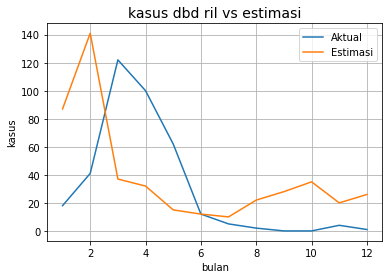

In [13]:
plt.plot(df_test['bulan'], df_test['kasus_dbd(aktual)'], label='Aktual')
plt.plot(df_test['bulan'], df_test['kasus_dbd(estimasi)'], label='Estimasi')
plt.title('kasus dbd ril vs estimasi', fontsize=14)
plt.xlabel('bulan')
plt.ylabel('kasus')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
print('Mean Absolute Error:', MAE)

Mean Absolute Error: 41.5
